In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from numpy.linalg import inv
from numpy import array
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
a = pd.read_csv('input.csv')
print(a)

                       City  AQI  Precipitation       GDP  Temperature  \
0          Ngawa Prefecture   23          665.1    271.13     8.200000   
1                 Aksu City  137           80.4    610.00    12.276712   
2               Alxa League   85          150.0    322.58    24.200000   
3                     Ngari   28           74.2     37.40     1.000000   
4                Anqin City   79         2127.8   1613.20    17.291781   
5               Anyang City  110          672.1   1884.48    15.350685   
6               Anshan City  111          708.0   2326.00    11.412329   
7                 Macao SAR   44         2000.0   3358.00    22.000000   
8             Bayannur City   53          188.0    887.43     3.700000   
9              Bazhong City   58         1198.9    501.34    16.900000   
10              Bengbu City   96          910.0   1253.10    16.013699   
11              Baotou City   45          262.9   3781.93     8.913699   
12               Baoji City  111      

In [14]:
#c = pd.read_csv('ans.txt')
#print(c.shape)
#print(c)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 12 columns):
City                      323 non-null object
AQI                       323 non-null int64
Precipitation             323 non-null float64
GDP                       323 non-null float64
Temperature               323 non-null float64
Longititute               323 non-null float64
Latitude                  323 non-null float64
Altitude                  323 non-null float64
PopulationDensity         323 non-null int64
Coastal                   323 non-null int64
GreenCoverageRate         323 non-null float64
Incineration(10000ton)    323 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.4+ KB


In [15]:
a.describe()

,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,Incineration(10000ton)
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,75.334365,1081.208978,2394.094241,16.004909,113.985779,31.843767,382.324768,2596.560372,0.247678,38.383096,52.418390
std,42.995735,584.634075,3263.974279,4.979733,7.711894,6.099390,743.180796,2913.835552,0.432334,6.321973,91.976476
min,12.000000,56.100000,22.500000,0.000000,80.105800,18.234043,1.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.000000,761.685000,13.750000,111.060575,27.664188,18.000000,714.000000,0.000000,36.000000,18.875000
50%,69.000000,910.000000,1328.520000,16.515068,115.500183,31.340637,62.000000,1787.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.250000,2722.180000,18.928767,119.867274,36.419417,354.500000,3509.000000,0.000000,42.675000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


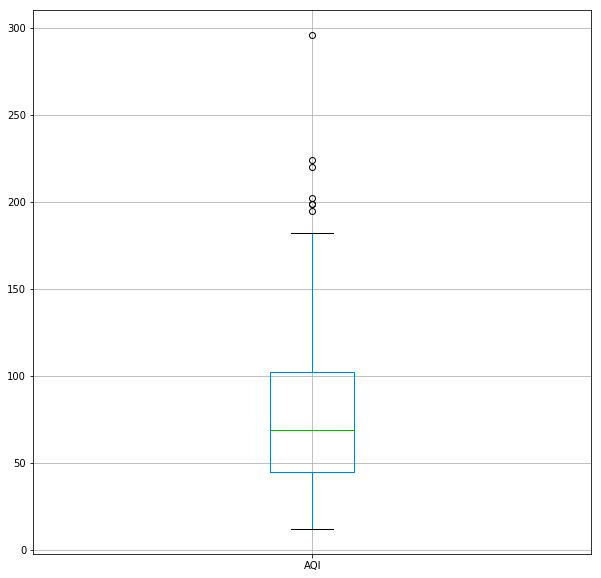

In [16]:
a.boxplot(['AQI'],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001B86521C50>,
      dtype=object)

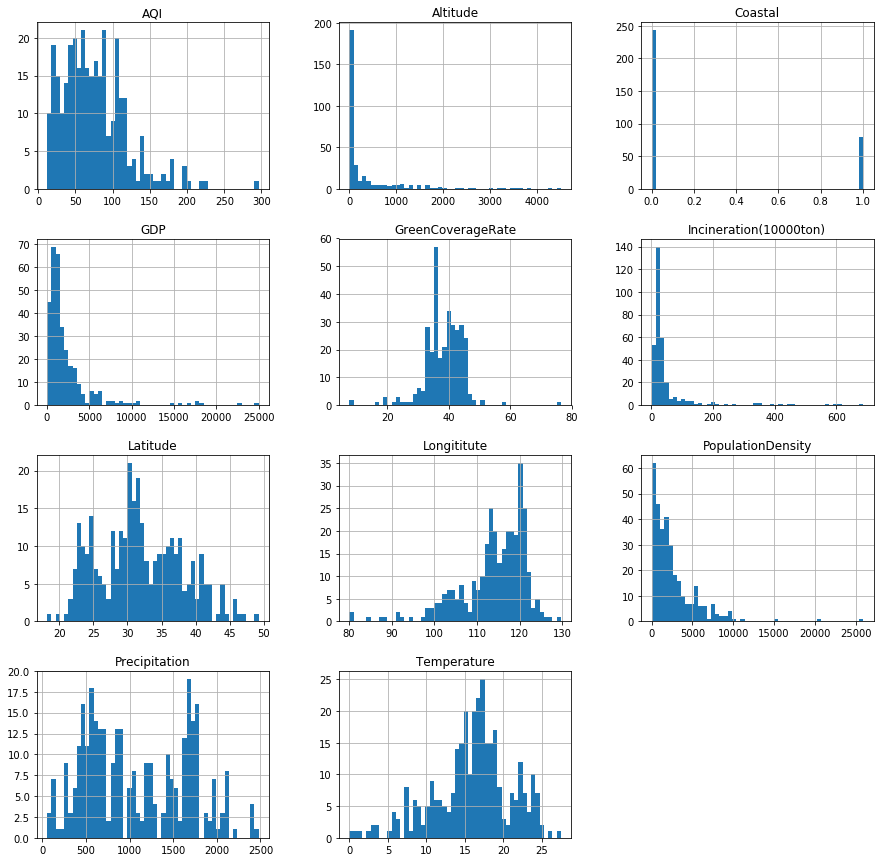

In [18]:
a.hist(bins=50,figsize=(15,15))

In [133]:
X_simp=a[['Precipitation','GDP','Temperature','Longititute','Latitude','Altitude','PopulationDensity','Coastal','GreenCoverageRate','Incineration(10000ton)'
]]

In [134]:
X = preprocessing.normalize(X_simp)


In [135]:
Y=a['AQI']

In [136]:
from sklearn.model_selection import train_test_split


In [137]:
 X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [138]:
print(X_test)

[[3.52160173e-01 9.01034221e-01 6.63591141e-03 5.01317847e-02
  1.43908081e-02 1.27133636e-02 2.46639255e-01 0.00000000e+00
  1.52560364e-02 1.14420273e-02]
 [8.73584577e-01 1.44517953e-01 9.09726426e-03 4.87419998e-02
  1.20802523e-02 4.58324129e-01 5.43858189e-02 0.00000000e+00
  1.77989953e-02 4.94416536e-03]
 [4.77455459e-01 8.14295915e-01 8.31109643e-03 9.78440043e-02
  3.27824705e-02 2.14497461e-02 3.10624100e-01 0.00000000e+00
  2.62163563e-02 2.46274862e-02]
 [5.80303056e-02 2.12408638e-02 5.53724290e-04 2.03884028e-02
  6.97165504e-03 9.97811171e-01 2.21489716e-04 0.00000000e+00
  7.97362978e-03 5.09426347e-03]
 [1.05663521e-01 5.14021626e-01 2.47130446e-03 2.15278816e-02
  7.24250299e-03 3.20587858e-03 8.50862543e-01 0.00000000e+00
  5.77058145e-03 9.18335104e-03]
 [1.93350158e-01 9.38234279e-01 2.12708757e-03 1.42338136e-02
  3.49818199e-03 1.17110938e-03 2.86219132e-01 1.17110938e-04
  4.58606433e-03 1.29993141e-02]
 [2.04528069e-01 2.48842484e-01 2.72704093e-03 1.94150539e

In [139]:
from sklearn.linear_model import LinearRegression


In [140]:
#score=0;
#for i in range(5):
 #   X_train, X_test, y_train, y_test = train_test_split(a, c, test_size=0.2,random_state=0)
  #  clf=LinearRegression().fit(X_train, y_train)
   # score += clf.score(X_test, y_test)
#print(score / 5.0)

In [141]:
#clf=LinearRegression().fit(X_train,y_train)
#clf.score(X_test, y_test)

In [142]:
lm=LinearRegression()

In [143]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
lm.coef_

array([-6.58157481e+01,  6.89833995e+00,  8.06078636e+03, -2.90089090e+03,
        9.87715481e+03, -7.14509653e+01, -1.60435047e+01, -1.18445601e+04,
       -1.02969614e+03, -3.54458662e+02])

In [145]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

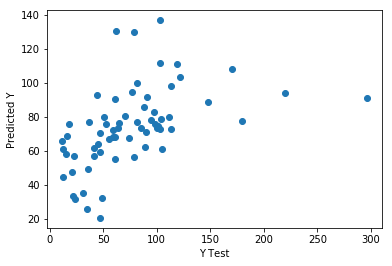

In [146]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [147]:
from sklearn import metrics

In [148]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))


MAE :   29.82821653114427
MSE :   1875.7333955359777


In [150]:
print(X_test) 

[[3.52160173e-01 9.01034221e-01 6.63591141e-03 5.01317847e-02
  1.43908081e-02 1.27133636e-02 2.46639255e-01 0.00000000e+00
  1.52560364e-02 1.14420273e-02]
 [8.73584577e-01 1.44517953e-01 9.09726426e-03 4.87419998e-02
  1.20802523e-02 4.58324129e-01 5.43858189e-02 0.00000000e+00
  1.77989953e-02 4.94416536e-03]
 [4.77455459e-01 8.14295915e-01 8.31109643e-03 9.78440043e-02
  3.27824705e-02 2.14497461e-02 3.10624100e-01 0.00000000e+00
  2.62163563e-02 2.46274862e-02]
 [5.80303056e-02 2.12408638e-02 5.53724290e-04 2.03884028e-02
  6.97165504e-03 9.97811171e-01 2.21489716e-04 0.00000000e+00
  7.97362978e-03 5.09426347e-03]
 [1.05663521e-01 5.14021626e-01 2.47130446e-03 2.15278816e-02
  7.24250299e-03 3.20587858e-03 8.50862543e-01 0.00000000e+00
  5.77058145e-03 9.18335104e-03]
 [1.93350158e-01 9.38234279e-01 2.12708757e-03 1.42338136e-02
  3.49818199e-03 1.17110938e-03 2.86219132e-01 1.17110938e-04
  4.58606433e-03 1.29993141e-02]
 [2.04528069e-01 2.48842484e-01 2.72704093e-03 1.94150539e

In [122]:
print(predictions)

[ 91.79992138  42.02313236 108.31497357   1.82948473 117.1485455
  63.55064776  75.71204284  72.55860595  60.1256723   89.08603241
  72.32179217  65.09390057  96.18751027  65.22674181 101.09168551
  96.52908142  66.8341368   55.15335818  51.38594288  38.60016555
  41.8682725   94.27127287 118.4882197   75.41910078  94.54651693
  57.62888835  60.22243419  72.88841025  51.60023492 135.28735327
  55.91635547  86.29377908 108.71923312  80.21551186  53.17279778
 139.49385967  90.11871937  51.67051708  35.84858349  33.01523598
  70.87677561  49.44237903  48.50966473  88.23612233  54.71426777
  75.99027033  64.32753144  91.3546681  101.67071088 106.57115787
 104.3405692   95.97303486  49.63937488  56.44089281  57.99531828
 104.92696285  94.63449242 104.70361058  67.08807212  42.54465176
  72.26012616  61.12672319  80.15838111  88.4262179   43.24177615]


In [19]:
plt.xlabel?
